In [8]:
#imports
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [6]:
#load data
df = pd.read_csv("../data/aggregated_data.csv")

In [9]:
#methods to visualize the distribution of the variables
def plot_distribution(df, column): 
    plt.figure(figsize=(10, 6)) 
    sns.histplot(df[column], kde=True, bins=30) 
    plt.title(f'Distribution of {column}') 
    plt.xlabel(column) 
    plt.ylabel('Frequency') 
    plt.show()

def check_normal_distribution(df, column):
    mean = df[column].mean()
    std = df[column].std()
    
    z_scores = (df[column] - mean) / std
    
    within_3_std = np.sum((z_scores > -3) & (z_scores < 3)) / len(z_scores)
    
    is_normal = within_3_std > 0.99  # If 99% of data points fall within -3 and 3, consider it normally distributed
    
    if is_normal:
        print(f"The column '{column}' is normally distributed.")
    else:
        print(f"The column '{column}' is not normally distributed.")

    return z_scores

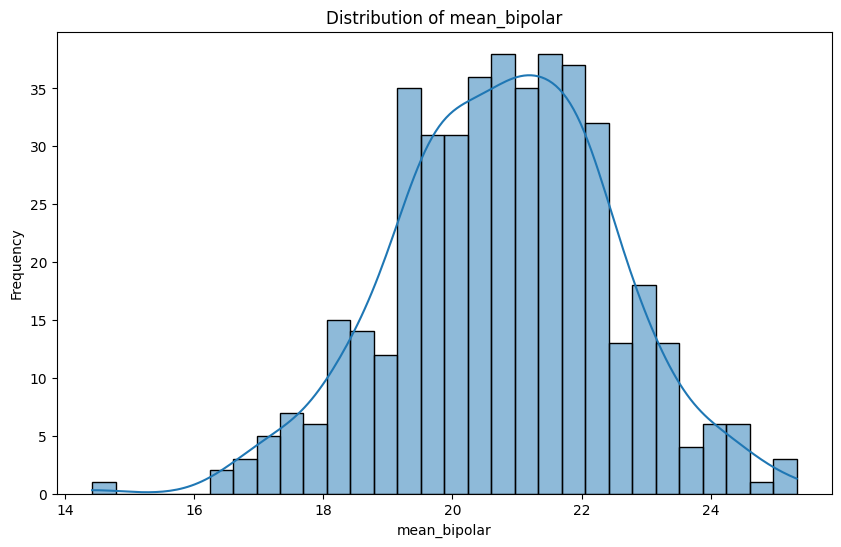

The column 'mean_bipolar' is normally distributed.


0      0.528849
1      1.025559
2      1.472597
3      1.869965
4     -0.017531
         ...   
437   -0.613582
438    0.677862
439    0.628191
440   -0.067202
441   -0.812266
Name: mean_bipolar, Length: 442, dtype: float64

In [10]:
plot_distribution(df, "mean_bipolar")
check_normal_distribution(df, "mean_bipolar")